<a href="https://colab.research.google.com/github/sharifulla01/Spam-Email-Detection/blob/main/SpamEmailDetactionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
df = pd.read_csv('/content/emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [87]:
df.shape

(5728, 2)

In [88]:
df.spam.value_counts()

,count
spam,
0,4360
1,1368


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [90]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [91]:
df.isnull().sum()

,0
text,0
spam,0


In [92]:
df.drop_duplicates(inplace=True)

# Separate X and Y

In [93]:
x = df.text.values

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [95]:
x = cv.fit_transform(x).toarray()


In [96]:
y = df.spam.values

In [97]:
y

array([1, 1, 1, ..., 0, 0, 0])

# Data Split

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20)

# Data Preprocessing

# Algorithm

In [100]:
from sklearn.naive_bayes import MultinomialNB

In [101]:
mnb = MultinomialNB()

In [102]:
mnb.fit(xtrain,ytrain)

MultinomialNB()

In [104]:
pred=mnb.predict(xtest)

In [105]:
mnb.score(xtest,ytest)

0.9841966637401229

In [106]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [107]:
classireport=classification_report(ytest,pred)
print(classireport)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       875
           1       0.94      0.99      0.97       264

    accuracy                           0.98      1139
   macro avg       0.97      0.99      0.98      1139
weighted avg       0.98      0.98      0.98      1139



In [108]:
confusion_matrix(ytest,pred)

array([[859,  16],
       [  2, 262]])

In [109]:
accuracy_score(ytest,pred)

0.9841966637401229

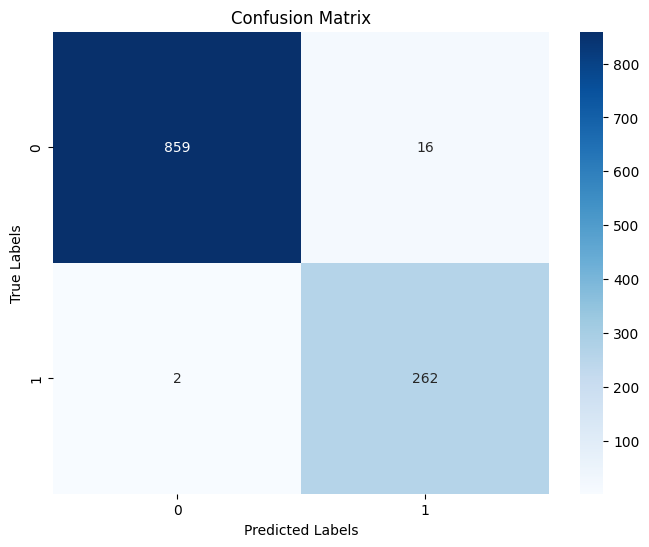

In [112]:
from sklearn.metrics import confusion_matrix

# Assuming ytest and pred are defined
cm = confusion_matrix(ytest, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()